# 🩺 Diabetes Dataset AdaBoost Classifier and Regressor Comprehensive Study / Diabetes Dataset ile AdaBoost Classifier ve Regressor Kapsamlı Çalışması

## 📋 Study Plan / Çalışma Planı:

### 🔍 **SECTION 1: DATA PREPARATION / BÖLÜM 1: VERİ HAZIRLAMA**
- **Step 1 / Adım 1:** Loading libraries / Kütüphanelerin yüklenmesi
- **Step 2 / Adım 2:** Dataset loading and initial examination / Veri setinin yüklenmesi ve ilk inceleme
- **Step 3 / Adım 3:** Missing and problematic values detection / Eksik ve problemli değerlerin tespiti
- **Step 4 / Adım 4:** Data visualization / Veri görselleştirme

### 🛠️ **SECTION 2: DATA PREPROCESSING AND CLASSIFICATION / BÖLÜM 2: VERİ ÖN İŞLEME VE SINIFLANDIRMA**
- **Step 5 / Adım 5:** Filling zero values with median / Median ile 0 değerleri doldurma
- **Step 6 / Adım 6:** Model training with AdaBoost Classifier / AdaBoost Classifier ile model eğitimi
- **Step 7 / Adım 7:** Comparison with other classifiers / Diğer sınıflandırıcılarla karşılaştırma

### 🔄 **SECTION 3: ALTERNATIVE APPROACH / BÖLÜM 3: ALTERNATİF YAKLAŞIM**
- **Step 8 / Adım 8:** Dropping rows with zero values / 0 değerli satırları drop etme
- **Step 9 / Adım 9:** Comparison of two approaches / İki yaklaşımın karşılaştırılması

### 📈 **SECTION 4: REGRESSION ANALYSIS / BÖLÜM 4: REGRESYON ANALİZİ**
- **Step 10 / Adım 10:** Model training with AdaBoost Regressor / AdaBoost Regressor ile model eğitimi
- **Step 11 / Adım 11:** Comparison with other regression algorithms / Diğer regresyon algoritmalarıyla karşılaştırma
- **Step 12 / Adım 12:** Feature importance analysis / Özellik önem derecelerinin analizi

---

## 🔍 SECTION 1: DATA PREPARATION / BÖLÜM 1: VERİ HAZIRLAMA

### Step 1: Loading Required Libraries / Adım 1: Gerekli Kütüphanelerin Yüklenmesi

**English:** In this step, we import all necessary libraries for our machine learning analysis including data manipulation, visualization, and algorithm implementation tools.

**Türkçe:** Bu adımda, veri manipülasyonu, görselleştirme ve algoritma uygulama araçları dahil olmak üzere makine öğrenmesi analizimiz için gerekli tüm kütüphaneleri import ediyoruz.

In [1]:
# Basic libraries / Temel kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine learning libraries / Makine öğrenmesi kütüphaneleri
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Classification algorithms / Sınıflandırma algoritmaları
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Regression algorithms / Regresyon algoritmaları
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

import time

print("✅ Libraries loaded successfully! / Kütüphaneler başarıyla yüklendi!")

✅ Libraries loaded successfully! / Kütüphaneler başarıyla yüklendi!


### Step 2: Dataset Loading and Initial Examination / Adım 2: Veri Setinin Yüklenmesi ve İlk İnceleme

**English:** We load the diabetes dataset and perform initial exploration to understand the data structure, dimensions, and basic statistics.

**Türkçe:** Diabetes veri setini yükleyip veri yapısını, boyutlarını ve temel istatistikleri anlamak için ilk keşfi gerçekleştiriyoruz.

In [2]:
# Load the dataset / Veri setini yükle
df = pd.read_csv('diabetes.csv')

print("📁 Dataset loaded successfully! / Veri seti başarıyla yüklendi!")
print(f"📊 Dataset size / Veri seti boyutu: {df.shape[0]} rows/satır, {df.shape[1]} columns/sütun")

print("\n🔍 First 5 rows / İlk 5 satır:")
display(df.head())

print("\n📊 Dataset information / Veri seti bilgileri:")
print(df.info())

print("\n📈 Statistical summary / İstatistiksel özet:")
display(df.describe().round(2))

📁 Dataset loaded successfully! / Veri seti başarıyla yüklendi!
📊 Dataset size / Veri seti boyutu: 768 rows/satır, 9 columns/sütun

🔍 First 5 rows / İlk 5 satır:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



📊 Dataset information / Veri seti bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

📈 Statistical summary / İstatistiksel özet:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


### Step 3: Missing and Problematic Values Detection / Adım 3: Eksik ve Problemli Değerlerin Tespiti

**English:** We identify missing values and problematic zero values in medical measurements that are medically impossible (e.g., glucose=0, BMI=0).

**Türkçe:** Eksik değerleri ve tıbbi açıdan imkansız olan problemli sıfır değerlerini (örn. glucose=0, BMI=0) tespit ediyoruz.

In [3]:
print("🔍 MISSING VALUE ANALYSIS / EKSİK DEĞER ANALİZİ:")
print("=" * 60)
print("Missing value counts / Eksik değer sayıları:")
print(df.isnull().sum())

print("\n⚠️ PROBLEMATIC ZERO VALUES / PROBLEMLİ 0 DEĞERLERİ:")
print("=" * 60)

# Medically impossible zero columns / Tıbbi açıdan 0 olamayacak sütunlar
medical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in medical_columns:
    zero_count = (df[col] == 0).sum()
    zero_percentage = (zero_count / len(df)) * 100
    print(f"{col:15}: {zero_count:3d} count/adet ({zero_percentage:5.1f}%)")

print("\n💡 These values should be treated as missing data and processed accordingly.")
print("💡 Bu değerler eksik veri olarak kabul edilmeli ve uygun şekilde işlenmelidir.")

🔍 MISSING VALUE ANALYSIS / EKSİK DEĞER ANALİZİ:
Missing value counts / Eksik değer sayıları:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

⚠️ PROBLEMATIC ZERO VALUES / PROBLEMLİ 0 DEĞERLERİ:
Glucose        :   5 count/adet (  0.7%)
BloodPressure  :  35 count/adet (  4.6%)
SkinThickness  : 227 count/adet ( 29.6%)
Insulin        : 374 count/adet ( 48.7%)
BMI            :  11 count/adet (  1.4%)

💡 These values should be treated as missing data and processed accordingly.
💡 Bu değerler eksik veri olarak kabul edilmeli ve uygun şekilde işlenmelidir.


### Step 4: Data Visualization / Adım 4: Veri Görselleştirme

**English:** We create comprehensive visualizations to understand target variable distribution, feature correlations, and data patterns.

**Türkçe:** Hedef değişken dağılımını, özellik korelasyonlarını ve veri desenlerini anlamak için kapsamlı görselleştirmeler oluşturuyoruz.

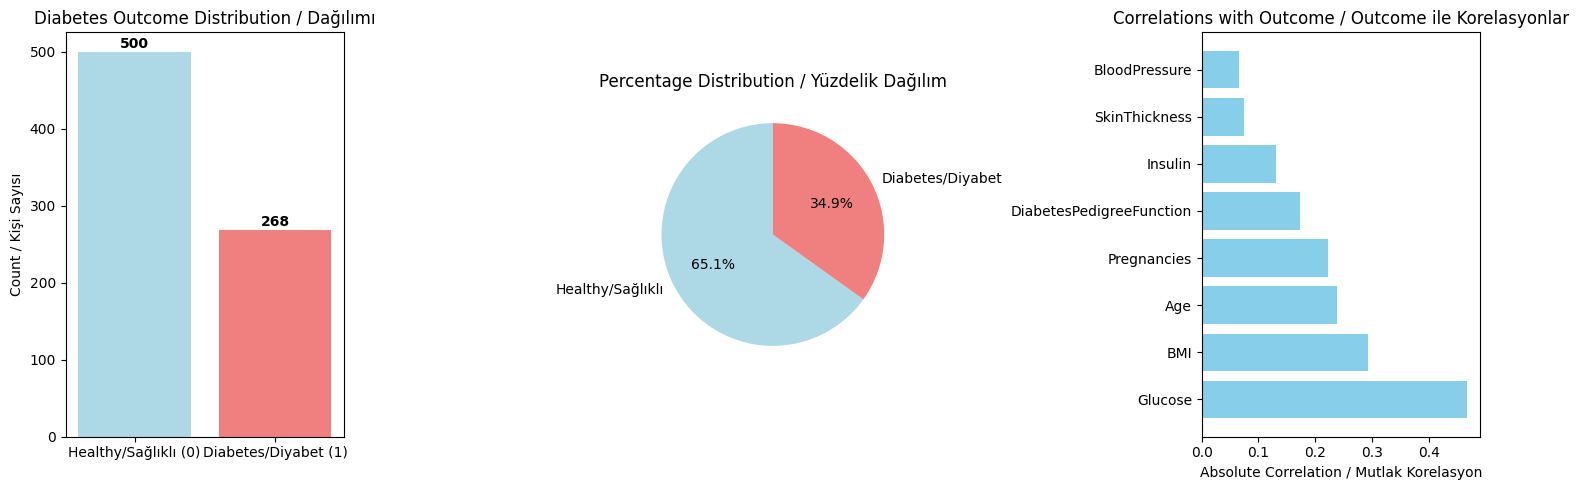

✅ Healthy/Sağlıklı: 500 people/kişi (65.1%)
🔴 Diabetes/Diyabet: 268 people/kişi (34.9%)


In [4]:
# Target variable analysis / Hedef değişken analizi
plt.figure(figsize=(15, 5))

outcome_counts = df['Outcome'].value_counts()
colors = ['lightblue', 'lightcoral']

plt.subplot(1, 3, 1)
plt.bar(['Healthy/Sağlıklı (0)', 'Diabetes/Diyabet (1)'], outcome_counts.values, color=colors)
plt.title('Diabetes Outcome Distribution / Dağılımı')
plt.ylabel('Count / Kişi Sayısı')
for i, v in enumerate(outcome_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.subplot(1, 3, 2)
plt.pie(outcome_counts.values, labels=['Healthy/Sağlıklı', 'Diabetes/Diyabet'], 
        autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Percentage Distribution / Yüzdelik Dağılım')

plt.subplot(1, 3, 3)
correlation_matrix = df.corr()
outcome_corr = correlation_matrix['Outcome'].abs().sort_values(ascending=False)
plt.barh(outcome_corr.index[1:], outcome_corr.values[1:], color='skyblue')
plt.title('Correlations with Outcome / Outcome ile Korelasyonlar')
plt.xlabel('Absolute Correlation / Mutlak Korelasyon')

plt.tight_layout()
plt.show()

percentages = outcome_counts / len(df) * 100
print(f"✅ Healthy/Sağlıklı: {outcome_counts[0]} people/kişi ({percentages[0]:.1f}%)")
print(f"🔴 Diabetes/Diyabet: {outcome_counts[1]} people/kişi ({percentages[1]:.1f}%)")

---

## 🛠️ SECTION 2: DATA PREPROCESSING AND CLASSIFICATION / BÖLÜM 2: VERİ ÖN İŞLEME VE SINIFLANDIRMA

### Step 5: Filling Zero Values with Median / Adım 5: Median ile 0 Değerleri Doldurma

**English:** We replace problematic zero values with median values calculated from non-zero entries. This approach preserves data distribution while handling missing values.

**Türkçe:** Problemli sıfır değerlerini, sıfır olmayan girişlerden hesaplanan median değerlerle değiştiriyoruz. Bu yaklaşım, eksik değerleri işlerken veri dağılımını korur.

In [5]:
print("🔄 MEDIAN IMPUTATION PROCESS / MEDİAN DOLDURMA İŞLEMİ:")
print("=" * 60)

# Copy dataset for median imputation / Median doldurma için veri kopyası
df_median_filled = df.copy()
columns_to_fill = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_to_fill:
    median_value = df_median_filled[df_median_filled[col] != 0][col].median()
    zero_count = (df_median_filled[col] == 0).sum()
    df_median_filled[col] = df_median_filled[col].replace(0, median_value)
    print(f"{col:15}: {zero_count:3d} values/değer → {median_value:6.1f} (median) replaced/ile değiştirildi")

# Prepare data / Veriyi hazırla
X_median = df_median_filled.drop('Outcome', axis=1)
y = df_median_filled['Outcome']

# Train-test split
X_train_median, X_test_median, y_train, y_test = train_test_split(
    X_median, y, test_size=0.2, random_state=42, stratify=y
)

# Standardization / Standardizasyon
scaler_median = StandardScaler()
X_train_median_scaled = scaler_median.fit_transform(X_train_median)
X_test_median_scaled = scaler_median.transform(X_test_median)

print(f"\n✅ Data preparation completed! / Veri hazırlığı tamamlandı!")
print(f"📊 Training set / Eğitim seti: {X_train_median_scaled.shape[0]} samples/örnek")
print(f"📊 Test set / Test seti: {X_test_median_scaled.shape[0]} samples/örnek")

🔄 MEDIAN IMPUTATION PROCESS / MEDİAN DOLDURMA İŞLEMİ:
Glucose        :   5 values/değer →  117.0 (median) replaced/ile değiştirildi
BloodPressure  :  35 values/değer →   72.0 (median) replaced/ile değiştirildi
SkinThickness  : 227 values/değer →   29.0 (median) replaced/ile değiştirildi
Insulin        : 374 values/değer →  125.0 (median) replaced/ile değiştirildi
BMI            :  11 values/değer →   32.3 (median) replaced/ile değiştirildi

✅ Data preparation completed! / Veri hazırlığı tamamlandı!
📊 Training set / Eğitim seti: 614 samples/örnek
📊 Test set / Test seti: 154 samples/örnek


### Step 6: Model Training with AdaBoost Classifier / Adım 6: AdaBoost Classifier ile Model Eğitimi

**English:** We implement and train the AdaBoost Classifier, our primary algorithm, for diabetes prediction. AdaBoost combines multiple weak learners to create a strong classifier.

**Türkçe:** Diabetes tahmini için ana algoritmamız olan AdaBoost Classifier'ı uygulayıp eğitiyoruz. AdaBoost, güçlü bir sınıflandırıcı oluşturmak için birden fazla zayıf öğreniciyi birleştirir.

🚀 ADABOOST CLASSIFIER TRAINING / EĞİTİMİ:
🎯 AdaBoost Accuracy / Doğruluk: 0.7597 (76.0%)
📊 Cross-Validation: 0.7492 (±0.0126)


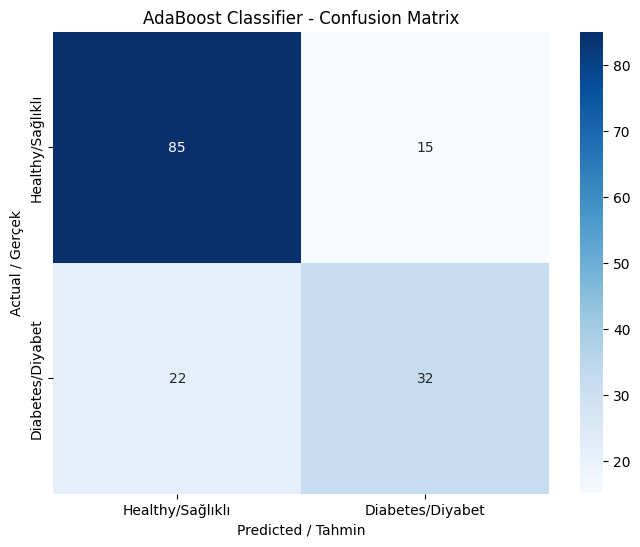


📋 Classification Report / Sınıflandırma Raporu:
                  precision    recall  f1-score   support

Healthy/Sağlıklı       0.79      0.85      0.82       100
Diabetes/Diyabet       0.68      0.59      0.63        54

        accuracy                           0.76       154
       macro avg       0.74      0.72      0.73       154
    weighted avg       0.75      0.76      0.76       154



In [6]:
print("🚀 ADABOOST CLASSIFIER TRAINING / EĞİTİMİ:")
print("=" * 60)

# AdaBoost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=42)
ada_classifier.fit(X_train_median_scaled, y_train)

# Prediction and evaluation / Tahmin ve değerlendirme
y_pred_ada = ada_classifier.predict(X_test_median_scaled)
ada_accuracy = accuracy_score(y_test, y_pred_ada)

print(f"🎯 AdaBoost Accuracy / Doğruluk: {ada_accuracy:.4f} ({ada_accuracy*100:.1f}%)")

# Cross-validation
cv_scores = cross_val_score(ada_classifier, X_train_median_scaled, y_train, cv=5)
print(f"📊 Cross-Validation: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Healthy/Sağlıklı', 'Diabetes/Diyabet'],
            yticklabels=['Healthy/Sağlıklı', 'Diabetes/Diyabet'])
plt.title('AdaBoost Classifier - Confusion Matrix')
plt.ylabel('Actual / Gerçek')
plt.xlabel('Predicted / Tahmin')
plt.show()

print("\n📋 Classification Report / Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_ada, target_names=['Healthy/Sağlıklı', 'Diabetes/Diyabet']))

### Step 7: Comparison with Other Classifiers / Adım 7: Diğer Sınıflandırıcılarla Karşılaştırma

**English:** We compare AdaBoost performance with other popular classification algorithms including Random Forest, KNN, SVM, and Decision Tree to evaluate its effectiveness.

**Türkçe:** AdaBoost performansını Random Forest, KNN, SVM ve Decision Tree gibi diğer popüler sınıflandırma algoritmalarıyla karşılaştırarak etkinliğini değerlendiriyoruz.

🏆 CLASSIFIER COMPARISON / SINIFLANDIRICI KARŞILAŞTIRMASI:
AdaBoost       : 0.7597 (CV: 0.7492±0.0126)
Random Forest  : 0.7792 (CV: 0.7688±0.0337)
KNN            : 0.7532 (CV: 0.7444±0.0297)
SVM            : 0.7403 (CV: 0.7688±0.0179)
Decision Tree  : 0.6818 (CV: 0.6873±0.0156)


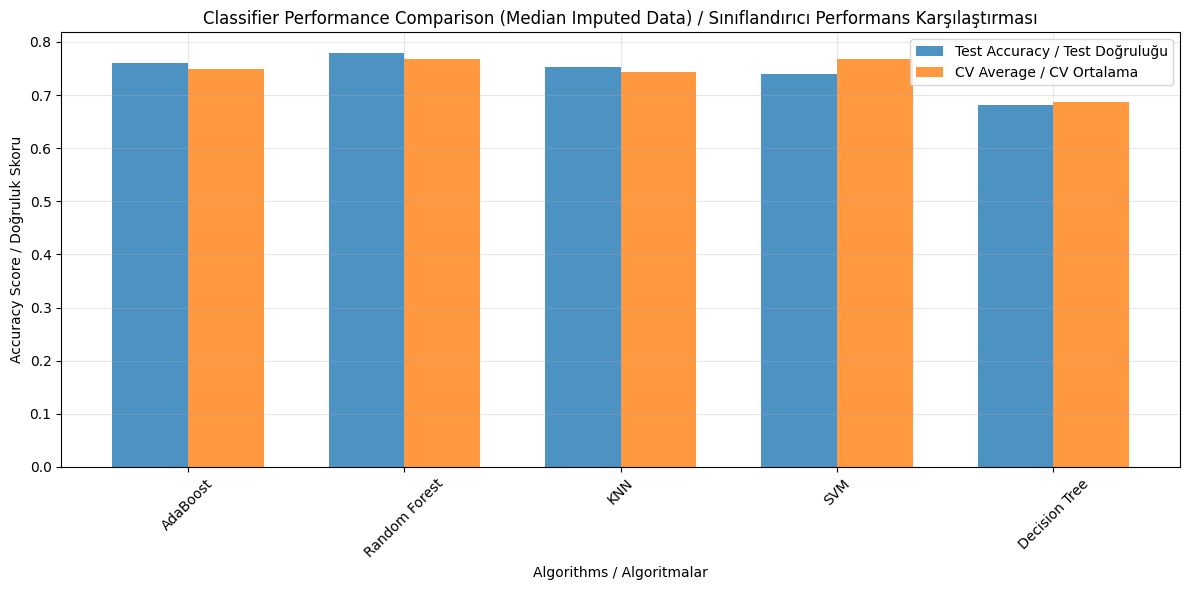

In [7]:
print("🏆 CLASSIFIER COMPARISON / SINIFLANDIRICI KARŞILAŞTIRMASI:")
print("=" * 60)

# Define classifiers / Sınıflandırıcıları tanımla
classifiers = {
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

results_median = {}

for name, classifier in classifiers.items():
    # Train and test / Eğit ve test et
    classifier.fit(X_train_median_scaled, y_train)
    y_pred = classifier.predict(X_test_median_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(classifier, X_train_median_scaled, y_train, cv=5)
    
    results_median[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }
    
    print(f"{name:15}: {accuracy:.4f} (CV: {cv_scores.mean():.4f}±{cv_scores.std():.4f})")

# Visualization / Görselleştirme
plt.figure(figsize=(12, 6))
algorithms = list(results_median.keys())
accuracies = [results_median[alg]['accuracy'] for alg in algorithms]
cv_means = [results_median[alg]['cv_mean'] for alg in algorithms]

x = np.arange(len(algorithms))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Test Accuracy / Test Doğruluğu', alpha=0.8)
plt.bar(x + width/2, cv_means, width, label='CV Average / CV Ortalama', alpha=0.8)

plt.xlabel('Algorithms / Algoritmalar')
plt.ylabel('Accuracy Score / Doğruluk Skoru')
plt.title('Classifier Performance Comparison (Median Imputed Data) / Sınıflandırıcı Performans Karşılaştırması')
plt.xticks(x, algorithms, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---

## 🔄 SECTION 3: ALTERNATIVE APPROACH / BÖLÜM 3: ALTERNATİF YAKLAŞIM

### Step 8: Dropping Rows with Zero Values / Adım 8: 0 Değerli Satırları Drop Etme

**English:** As an alternative preprocessing approach, we remove all rows containing problematic zero values and compare this method with median imputation.

**Türkçe:** Alternatif bir ön işleme yaklaşımı olarak, problemli sıfır değerler içeren tüm satırları kaldırıyor ve bu yöntemi median doldurma ile karşılaştırıyoruz.

In [8]:
print("🗑️ DROPPING ROWS WITH ZERO VALUES / 0 DEĞERLİ SATIRLARI DROP ETME:")
print("=" * 70)

# Drop rows with zero values / 0 değerli satırları drop et
df_dropped = df.copy()
print(f"Original size / Orijinal boyut: {len(df_dropped)}")

for col in columns_to_fill:
    before = len(df_dropped)
    df_dropped = df_dropped[df_dropped[col] != 0]
    after = len(df_dropped)
    print(f"{col}: {before - after} rows removed / satır kaldırıldı")

print(f"\nFinal size / Son boyut: {len(df_dropped)} ({len(df) - len(df_dropped)} rows lost / satır kaybı)")

# Model training with cleaned data / Temizlenmiş veri ile model eğitimi
X_dropped = df_dropped.drop('Outcome', axis=1)
y_dropped = df_dropped['Outcome']

X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(
    X_dropped, y_dropped, test_size=0.2, random_state=42, stratify=y_dropped
)

scaler_dropped = StandardScaler()
X_train_dropped_scaled = scaler_dropped.fit_transform(X_train_dropped)
X_test_dropped_scaled = scaler_dropped.transform(X_test_dropped)

# Classifier tests with cleaned data / Temizlenmiş veri ile sınıflandırıcı testleri
results_dropped = {}

for name, _ in classifiers.items():
    if name == 'AdaBoost':
        model = AdaBoostClassifier(n_estimators=100, random_state=42)
    elif name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif name == 'KNN':
        model = KNeighborsClassifier(n_neighbors=5)
    elif name == 'SVM':
        model = SVC(kernel='rbf', random_state=42)
    elif name == 'Decision Tree':
        model = DecisionTreeClassifier(random_state=42)
    
    model.fit(X_train_dropped_scaled, y_train_dropped)
    y_pred = model.predict(X_test_dropped_scaled)
    accuracy = accuracy_score(y_test_dropped, y_pred)
    cv_scores = cross_val_score(model, X_train_dropped_scaled, y_train_dropped, cv=5)
    
    results_dropped[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std()
    }

print("\n📊 Cleaned data results / Temizlenmiş veri sonuçları:")
for name, result in results_dropped.items():
    print(f"{name:15}: {result['accuracy']:.4f} (CV: {result['cv_mean']:.4f}±{result['cv_std']:.4f})")

🗑️ DROPPING ROWS WITH ZERO VALUES / 0 DEĞERLİ SATIRLARI DROP ETME:
Original size / Orijinal boyut: 768
Glucose: 5 rows removed / satır kaldırıldı
BloodPressure: 35 rows removed / satır kaldırıldı
SkinThickness: 194 rows removed / satır kaldırıldı
Insulin: 141 rows removed / satır kaldırıldı
BMI: 1 rows removed / satır kaldırıldı

Final size / Son boyut: 392 (376 rows lost / satır kaybı)

📊 Cleaned data results / Temizlenmiş veri sonuçları:
AdaBoost       : 0.8481 (CV: 0.7733±0.0431)
Random Forest  : 0.8228 (CV: 0.7765±0.0357)
KNN            : 0.7848 (CV: 0.7508±0.0280)
SVM            : 0.7595 (CV: 0.7475±0.0316)
Decision Tree  : 0.7215 (CV: 0.7091±0.0479)


### Step 9: Comparison of Two Approaches / Adım 9: İki Yaklaşımın Karşılaştırılması

**English:** We systematically compare the performance of median imputation versus row deletion approaches across all algorithms to determine the optimal preprocessing strategy.

**Türkçe:** Optimal ön işleme stratejisini belirlemek için median doldurma ve satır silme yaklaşımlarının performansını tüm algoritmalar genelinde sistematik olarak karşılaştırıyoruz.

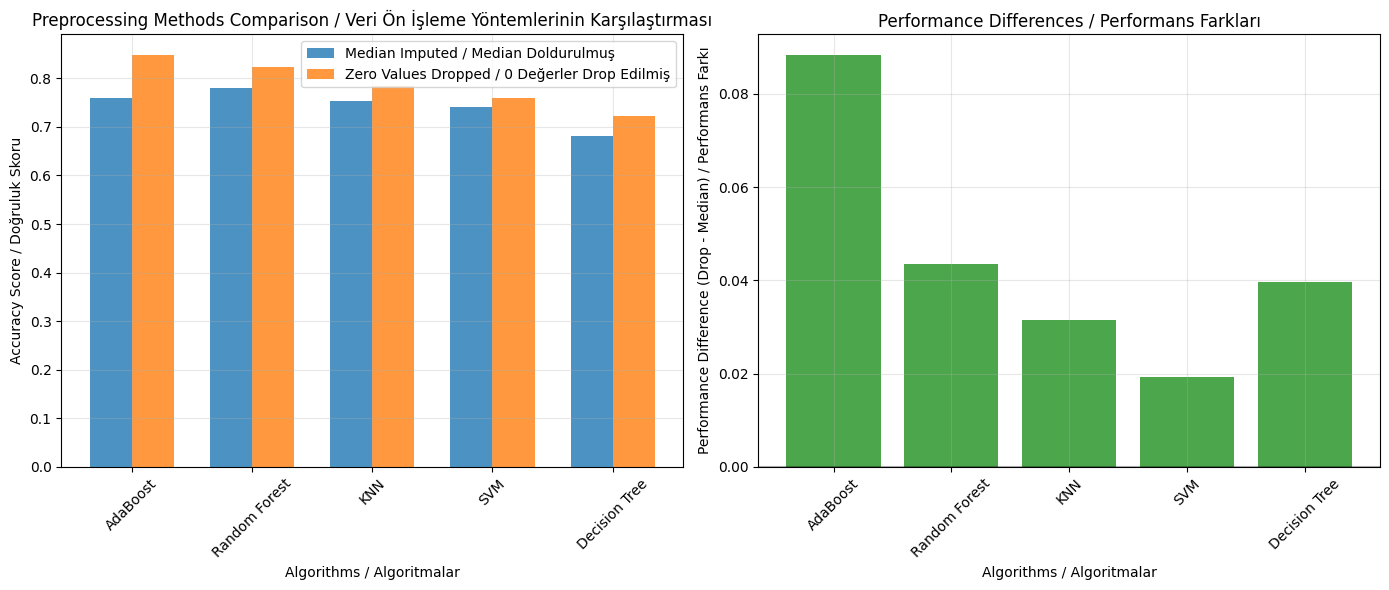


📊 Performance Comparison Table / Performans Karşılaştırma Tablosu:


,Algorithm / Algoritma,Median Imputed / Median Doldurulmuş,Zero Values Dropped / 0 Değerler Drop,Difference / Fark
0,AdaBoost,0.7597,0.8481,0.0884
1,Random Forest,0.7792,0.8228,0.0436
2,KNN,0.7532,0.7848,0.0316
3,SVM,0.7403,0.7595,0.0192
4,Decision Tree,0.6818,0.7215,0.0397


In [9]:
# Median vs Dropped comparison / Median vs Dropped karşılaştırması
plt.figure(figsize=(14, 6))

algorithms = list(results_median.keys())
median_accuracies = [results_median[alg]['accuracy'] for alg in algorithms]
dropped_accuracies = [results_dropped[alg]['accuracy'] for alg in algorithms]

x = np.arange(len(algorithms))
width = 0.35

plt.subplot(1, 2, 1)
plt.bar(x - width/2, median_accuracies, width, label='Median Imputed / Median Doldurulmuş', alpha=0.8)
plt.bar(x + width/2, dropped_accuracies, width, label='Zero Values Dropped / 0 Değerler Drop Edilmiş', alpha=0.8)
plt.xlabel('Algorithms / Algoritmalar')
plt.ylabel('Accuracy Score / Doğruluk Skoru')
plt.title('Preprocessing Methods Comparison / Veri Ön İşleme Yöntemlerinin Karşılaştırması')
plt.xticks(x, algorithms, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
differences = [dropped_accuracies[i] - median_accuracies[i] for i in range(len(algorithms))]
colors = ['green' if diff > 0 else 'red' for diff in differences]
plt.bar(algorithms, differences, color=colors, alpha=0.7)
plt.xlabel('Algorithms / Algoritmalar')
plt.ylabel('Performance Difference (Drop - Median) / Performans Farkı')
plt.title('Performance Differences / Performans Farkları')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Comparison table / Karşılaştırma tablosu
comparison_df = pd.DataFrame({
    'Algorithm / Algoritma': algorithms,
    'Median Imputed / Median Doldurulmuş': median_accuracies,
    'Zero Values Dropped / 0 Değerler Drop': dropped_accuracies,
    'Difference / Fark': differences
})
print("\n📊 Performance Comparison Table / Performans Karşılaştırma Tablosu:")
display(comparison_df.round(4))

---

## 📈 SECTION 4: REGRESSION ANALYSIS / BÖLÜM 4: REGRESYON ANALİZİ

### Step 10: Model Training with AdaBoost Regressor / Adım 10: AdaBoost Regressor ile Model Eğitimi

**English:** We implement AdaBoost Regressor to predict continuous glucose levels, demonstrating the algorithm's versatility beyond classification tasks.

**Türkçe:** Sürekli glucose seviyelerini tahmin etmek için AdaBoost Regressor uygulayarak algoritmanın sınıflandırma görevlerinin ötesindeki çok yönlülüğünü gösteriyoruz.

📈 ADABOOST REGRESSOR TRAINING / EĞİTİMİ:
🎯 AdaBoost Regressor Results / Sonuçları:
MSE: 922.0847
RMSE: 30.3658
MAE: 25.5419
R² Score: 0.0837


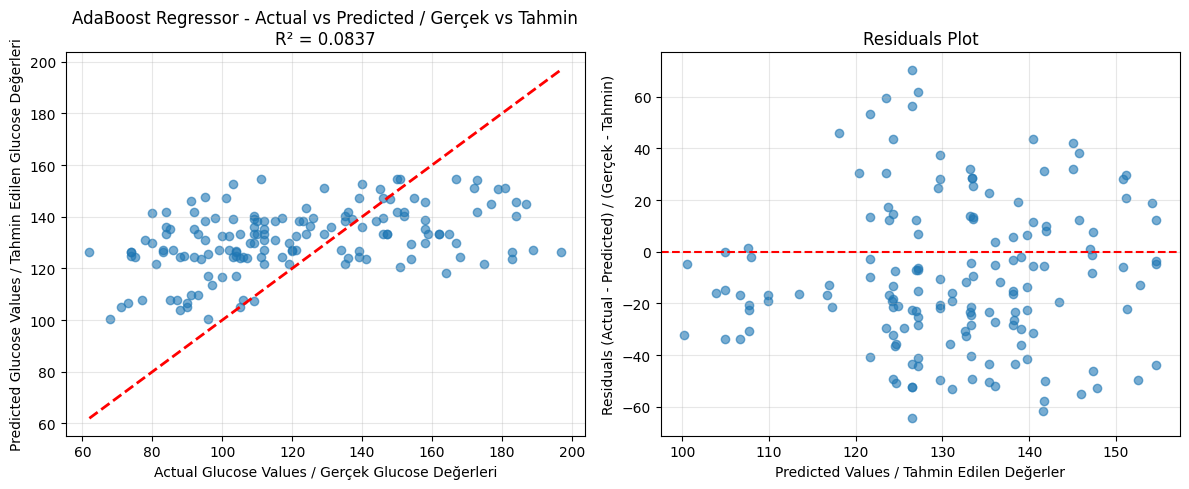

In [10]:
print("📈 ADABOOST REGRESSOR TRAINING / EĞİTİMİ:")
print("=" * 60)

# Use Glucose as target variable for regression / Regresyon için Glucose'u hedef değişken olarak kullan
X_reg = df_median_filled.drop(['Glucose', 'Outcome'], axis=1)
y_reg = df_median_filled['Glucose']

# Train-test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Standardization / Standardizasyon
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# AdaBoost Regressor
ada_regressor = AdaBoostRegressor(n_estimators=100, learning_rate=1.0, random_state=42)
ada_regressor.fit(X_train_reg_scaled, y_train_reg)

# Prediction and evaluation / Tahmin ve değerlendirme
y_pred_reg_ada = ada_regressor.predict(X_test_reg_scaled)

mse_ada = mean_squared_error(y_test_reg, y_pred_reg_ada)
rmse_ada = np.sqrt(mse_ada)
mae_ada = mean_absolute_error(y_test_reg, y_pred_reg_ada)
r2_ada = r2_score(y_test_reg, y_pred_reg_ada)

print(f"🎯 AdaBoost Regressor Results / Sonuçları:")
print(f"MSE: {mse_ada:.4f}")
print(f"RMSE: {rmse_ada:.4f}")
print(f"MAE: {mae_ada:.4f}")
print(f"R² Score: {r2_ada:.4f}")

# Visualization / Görselleştirme
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_reg_ada, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual Glucose Values / Gerçek Glucose Değerleri')
plt.ylabel('Predicted Glucose Values / Tahmin Edilen Glucose Değerleri')
plt.title(f'AdaBoost Regressor - Actual vs Predicted / Gerçek vs Tahmin\nR² = {r2_ada:.4f}')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
residuals = y_test_reg - y_pred_reg_ada
plt.scatter(y_pred_reg_ada, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values / Tahmin Edilen Değerler')
plt.ylabel('Residuals (Actual - Predicted) / (Gerçek - Tahmin)')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 11: Comparison with Other Regression Algorithms / Adım 11: Diğer Regresyon Algoritmalarıyla Karşılaştırma

**English:** We evaluate AdaBoost Regressor against other regression algorithms including Random Forest, KNN, SVR, Decision Tree, and Linear Regression using multiple performance metrics.

**Türkçe:** AdaBoost Regressor'ı Random Forest, KNN, SVR, Decision Tree ve Linear Regression gibi diğer regresyon algoritmalarına karşı birden fazla performans metriği kullanarak değerlendiriyoruz.

🏆 REGRESSION ALGORITHMS COMPARISON / REGRESYON ALGORİTMALARI KARŞILAŞTIRMASI:
Algorithm/Algoritma MSE        RMSE       MAE        R² Score  
--------------------------------------------------------------------------------
AdaBoost           922.0847   30.3658    25.5419    0.0837    
Random Forest      812.6442   28.5069    22.9718    0.1925    
KNN                963.1200   31.0342    25.1377    0.0429    
SVR                819.9627   28.6350    23.6077    0.1852    
Decision Tree      1416.0844  37.6309    29.4091    -0.4072   
Linear Regression  766.9533   27.6939    22.3321    0.2379    


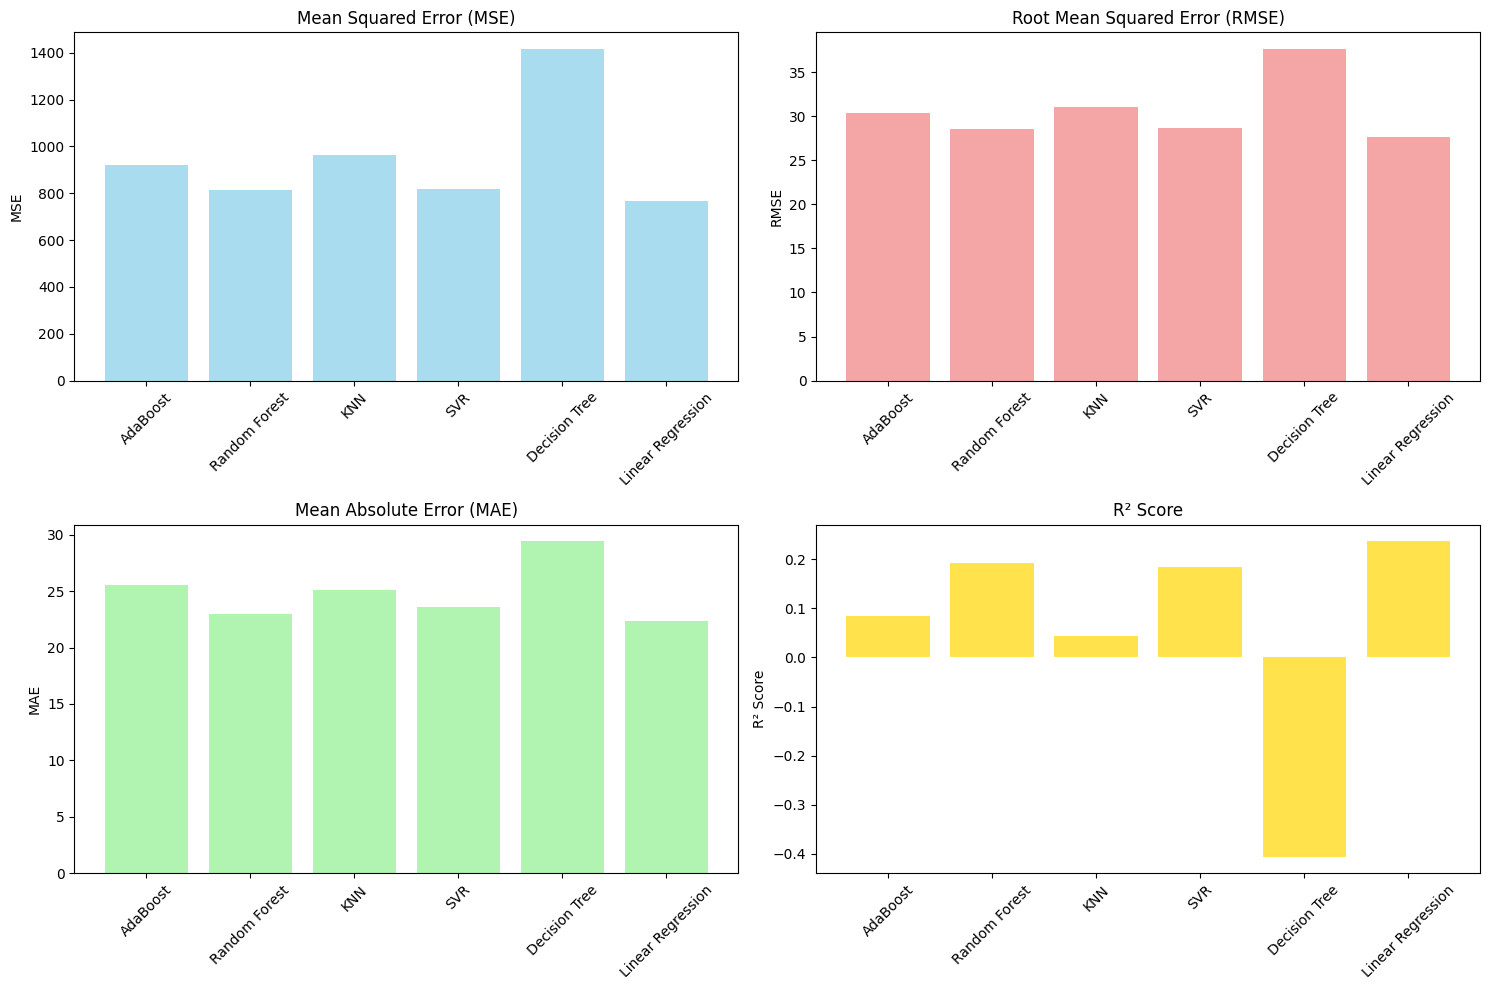

In [11]:
print("🏆 REGRESSION ALGORITHMS COMPARISON / REGRESYON ALGORİTMALARI KARŞILAŞTIRMASI:")
print("=" * 80)

# Define regression algorithms / Regresyon algoritmalarını tanımla
regressors = {
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

regression_results = {}

print(f"{'Algorithm/Algoritma':<18} {'MSE':<10} {'RMSE':<10} {'MAE':<10} {'R² Score':<10}")
print("-" * 80)

for name, regressor in regressors.items():
    regressor.fit(X_train_reg_scaled, y_train_reg)
    y_pred = regressor.predict(X_test_reg_scaled)
    
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    regression_results[name] = {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2
    }
    
    print(f"{name:<18} {mse:<10.4f} {rmse:<10.4f} {mae:<10.4f} {r2:<10.4f}")

# Visualize regression results / Regresyon sonuçlarını görselleştir
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

algorithms = list(regression_results.keys())
mse_values = [regression_results[alg]['mse'] for alg in algorithms]
rmse_values = [regression_results[alg]['rmse'] for alg in algorithms]
mae_values = [regression_results[alg]['mae'] for alg in algorithms]
r2_values = [regression_results[alg]['r2'] for alg in algorithms]

axes[0, 0].bar(algorithms, mse_values, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].tick_params(axis='x', rotation=45)

axes[0, 1].bar(algorithms, rmse_values, color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

axes[1, 0].bar(algorithms, mae_values, color='lightgreen', alpha=0.7)
axes[1, 0].set_title('Mean Absolute Error (MAE)')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].bar(algorithms, r2_values, color='gold', alpha=0.7)
axes[1, 1].set_title('R² Score')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Step 12: Feature Importance Analysis / Adım 12: Özellik Önem Derecelerinin Analizi

**English:** We analyze feature importance from both AdaBoost Classifier and Regressor to understand which medical measurements are most influential for diabetes prediction and glucose level estimation.

**Türkçe:** Diabetes tahmini ve glucose seviyesi tahmini için hangi tıbbi ölçümlerin en etkili olduğunu anlamak için hem AdaBoost Classifier hem de Regressor'dan özellik önemlerini analiz ediyoruz.

🔍 FEATURE IMPORTANCE ANALYSIS / ÖZELLİK ÖNEM DERECELERİ ANALİZİ:


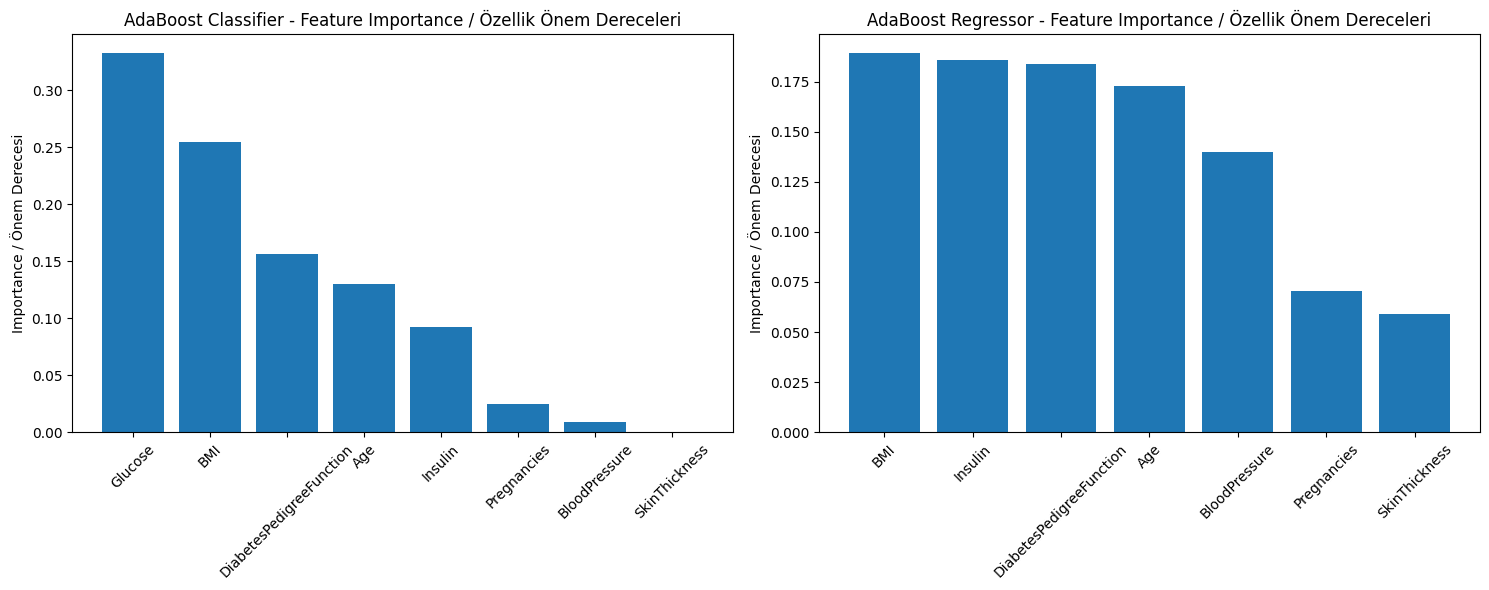


🎯 AdaBoost Classifier - Most Important Features / En Önemli Özellikler:
Glucose             : 0.3325
BMI                 : 0.2551
DiabetesPedigreeFunction: 0.1560
Age                 : 0.1300
Insulin             : 0.0924

📈 AdaBoost Regressor - Most Important Features / En Önemli Özellikler:
BMI                 : 0.1891
Insulin             : 0.1859
DiabetesPedigreeFunction: 0.1835
Age                 : 0.1726
BloodPressure       : 0.1397


In [12]:
print("🔍 FEATURE IMPORTANCE ANALYSIS / ÖZELLİK ÖNEM DERECELERİ ANALİZİ:")
print("=" * 70)

# Feature importance for AdaBoost models / AdaBoost modelleri için özellik önemleri
ada_classifier_final = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier_final.fit(X_train_median_scaled, y_train)

ada_regressor_final = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_regressor_final.fit(X_train_reg_scaled, y_train_reg)

plt.figure(figsize=(15, 6))

# Classifier feature importance / Classifier özellik önemleri
plt.subplot(1, 2, 1)
feature_names = X_median.columns
classifier_importances = ada_classifier_final.feature_importances_
sorted_idx = np.argsort(classifier_importances)[::-1]
plt.bar(range(len(classifier_importances)), classifier_importances[sorted_idx])
plt.xticks(range(len(classifier_importances)), [feature_names[i] for i in sorted_idx], rotation=45)
plt.title('AdaBoost Classifier - Feature Importance / Özellik Önem Dereceleri')
plt.ylabel('Importance / Önem Derecesi')

# Regressor feature importance / Regressor özellik önemleri
plt.subplot(1, 2, 2)
reg_feature_names = X_reg.columns
regressor_importances = ada_regressor_final.feature_importances_
sorted_idx_reg = np.argsort(regressor_importances)[::-1]
plt.bar(range(len(regressor_importances)), regressor_importances[sorted_idx_reg])
plt.xticks(range(len(regressor_importances)), [reg_feature_names[i] for i in sorted_idx_reg], rotation=45)
plt.title('AdaBoost Regressor - Feature Importance / Özellik Önem Dereceleri')
plt.ylabel('Importance / Önem Derecesi')

plt.tight_layout()
plt.show()

# Print feature importance / Özellik önemlerini yazdır
print("\n🎯 AdaBoost Classifier - Most Important Features / En Önemli Özellikler:")
for i in sorted_idx[:5]:
    print(f"{feature_names[i]:20}: {classifier_importances[i]:.4f}")

print("\n📈 AdaBoost Regressor - Most Important Features / En Önemli Özellikler:")
for i in sorted_idx_reg[:5]:
    print(f"{reg_feature_names[i]:20}: {regressor_importances[i]:.4f}")

---

## 📊 STUDY RESULTS SUMMARY / ÇALIŞMA SONUÇLARI ÖZETİ

In [13]:
print("=" * 90)
print("                    STUDY RESULTS SUMMARY / ÇALIŞMA SONUÇLARI ÖZETİ")
print("=" * 90)

print("\n📊 DATASET INFORMATION / VERİ SETİ BİLGİLERİ:")
print(f"   - Total samples / Toplam örnek sayısı: {len(df)}")
print(f"   - Number of features / Özellik sayısı: {len(df.columns)-1}")
print(f"   - Diabetes positive rate / Diyabet pozitif oranı: {df['Outcome'].mean():.2%}")

print("\n🛠️ DATA PREPROCESSING IMPACT / VERİ ÖN İŞLEME ETKİSİ:")
best_median = max(results_median.values(), key=lambda x: x['accuracy'])
best_dropped = max(results_dropped.values(), key=lambda x: x['accuracy'])
best_median_alg = [k for k, v in results_median.items() if v['accuracy'] == best_median['accuracy']][0]
best_dropped_alg = [k for k, v in results_dropped.items() if v['accuracy'] == best_dropped['accuracy']][0]

print(f"   - Best median result / En iyi median sonucu: {best_median_alg} ({best_median['accuracy']:.4f})")
print(f"   - Best drop result / En iyi drop sonucu: {best_dropped_alg} ({best_dropped['accuracy']:.4f})")

print("\n🎯 CLASSIFICATION RESULTS (Median Imputed) / SINIFLANDIRMA SONUÇLARI:")
for alg, result in sorted(results_median.items(), key=lambda x: x[1]['accuracy'], reverse=True):
    print(f"   - {alg:15}: {result['accuracy']:.4f} (CV: {result['cv_mean']:.4f}±{result['cv_std']:.4f})")

print("\n📈 REGRESSION RESULTS (Glucose Prediction) / REGRESYON SONUÇLARI:")
for alg, result in sorted(regression_results.items(), key=lambda x: x[1]['r2'], reverse=True):
    print(f"   - {alg:15}: R²={result['r2']:.4f}, RMSE={result['rmse']:.4f}")

print("\n🏆 KEY FINDINGS / ANA BULGULAR:")
best_classifier = max(results_median.items(), key=lambda x: x[1]['accuracy'])
best_regressor = max(regression_results.items(), key=lambda x: x[1]['r2'])
print(f"   - Best classifier / En iyi sınıflandırıcı: {best_classifier[0]} ({best_classifier[1]['accuracy']:.4f})")
print(f"   - Best regressor / En iyi regressor: {best_regressor[0]} (R²={best_regressor[1]['r2']:.4f})")
print(f"   - AdaBoost Classifier performance / performansı: {results_median['AdaBoost']['accuracy']:.4f}")
print(f"   - AdaBoost Regressor performance / performansı: R²={regression_results['AdaBoost']['r2']:.4f}")

print("\n✅ CONCLUSION / SONUÇ:")
if results_median['AdaBoost']['accuracy'] > 0.75:
    print("   🎉 AdaBoost Classifier shows acceptable performance / kabul edilebilir performans gösteriyor")
else:
    print("   ⚠️ AdaBoost Classifier performance can be improved / performansı geliştirilebilir")
    
if regression_results['AdaBoost']['r2'] > 0.5:
    print("   🎉 AdaBoost Regressor shows reasonable explanatory power / makul açıklayıcılık gösteriyor")
else:
    print("   ⚠️ AdaBoost Regressor performance is low / performansı düşük")

print("\n" + "=" * 90)
print("🎓 Study completed! Ready for GitHub upload. / Çalışma tamamlandı! GitHub'a yüklenmeye hazır.")
print("=" * 90)

                    STUDY RESULTS SUMMARY / ÇALIŞMA SONUÇLARI ÖZETİ

📊 DATASET INFORMATION / VERİ SETİ BİLGİLERİ:
   - Total samples / Toplam örnek sayısı: 768
   - Number of features / Özellik sayısı: 8
   - Diabetes positive rate / Diyabet pozitif oranı: 34.90%

🛠️ DATA PREPROCESSING IMPACT / VERİ ÖN İŞLEME ETKİSİ:
   - Best median result / En iyi median sonucu: Random Forest (0.7792)
   - Best drop result / En iyi drop sonucu: AdaBoost (0.8481)

🎯 CLASSIFICATION RESULTS (Median Imputed) / SINIFLANDIRMA SONUÇLARI:
   - Random Forest  : 0.7792 (CV: 0.7688±0.0337)
   - AdaBoost       : 0.7597 (CV: 0.7492±0.0126)
   - KNN            : 0.7532 (CV: 0.7444±0.0297)
   - SVM            : 0.7403 (CV: 0.7688±0.0179)
   - Decision Tree  : 0.6818 (CV: 0.6873±0.0156)

📈 REGRESSION RESULTS (Glucose Prediction) / REGRESYON SONUÇLARI:
   - Linear Regression: R²=0.2379, RMSE=27.6939
   - Random Forest  : R²=0.1925, RMSE=28.5069
   - SVR            : R²=0.1852, RMSE=28.6350
   - AdaBoost       : R²=0.